In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [27]:
data='https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [28]:
!wget $data

--2025-08-02 01:20:59--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]   1.41M  --.-KB/s    in 0.01s   

2025-08-02 01:20:59 (126 MB/s) - ‘data.csv.5’ saved [1475504/1475504]



In [29]:
df=pd.read_csv('data.csv')

In [30]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [31]:
df.loc[1]

Make                                         BMW
Model                                   1 Series
Year                                        2011
Engine Fuel Type     premium unleaded (required)
Engine HP                                  300.0
Engine Cylinders                             6.0
Transmission Type                         MANUAL
Driven_Wheels                   rear wheel drive
Number of Doors                              2.0
Market Category               Luxury,Performance
Vehicle Size                             Compact
Vehicle Style                        Convertible
highway MPG                                   28
city mpg                                      19
Popularity                                  3916
MSRP                                       40650
Name: 1, dtype: object

In [32]:
df.iloc[[1,3]]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450


In [33]:
#little bit of cleaning
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

In [34]:
df.loc[1]

make                                         BMW
model                                   1 Series
year                                        2011
engine_fuel_type     premium unleaded (required)
engine_hp                                  300.0
engine_cylinders                             6.0
transmission_type                         MANUAL
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category               Luxury,Performance
vehicle_size                             Compact
vehicle_style                        Convertible
highway_mpg                                   28
city_mpg                                      19
popularity                                  3916
msrp                                       40650
Name: 1, dtype: object

In [35]:
df.city_mpg

0        19
1        19
2        20
3        18
4        18
         ..
11909    16
11910    16
11911    16
11912    16
11913    17
Name: city_mpg, Length: 11914, dtype: int64

In [36]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [37]:
df.dtypes=='object'

make                  True
model                 True
year                 False
engine_fuel_type      True
engine_hp            False
engine_cylinders     False
transmission_type     True
driven_wheels         True
number_of_doors      False
market_category       True
vehicle_size          True
vehicle_style         True
highway_mpg          False
city_mpg             False
popularity           False
msrp                 False
dtype: bool

In [38]:
list_object=list(df.dtypes[ df.dtypes=='object'].index)

In [39]:
for col in list_object:
    df[col]=df[col].str.lower()
    df[col]=df[col].str.replace(' ', '_')

In [40]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [41]:
for col in df.columns:
    print(col)
    print(df[col].head()[1])

make
bmw
model
1_series
year
2011
engine_fuel_type
premium_unleaded_(required)
engine_hp
300.0
engine_cylinders
6.0
transmission_type
manual
driven_wheels
rear_wheel_drive
number_of_doors
2.0
market_category
luxury,performance
vehicle_size
compact
vehicle_style
convertible
highway_mpg
28
city_mpg
19
popularity
3916
msrp
40650


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

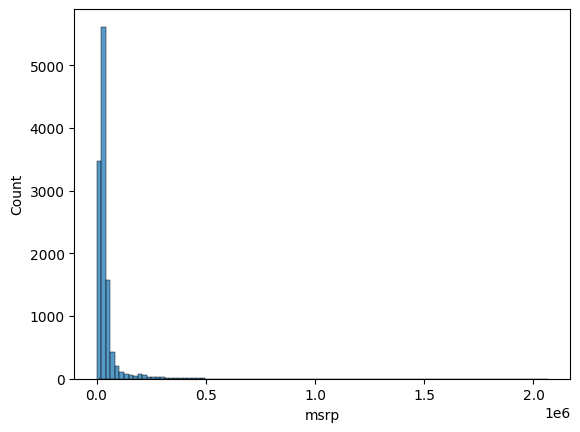

In [43]:
sns.histplot(df.msrp, bins=100)

<Axes: xlabel='msrp', ylabel='Count'>

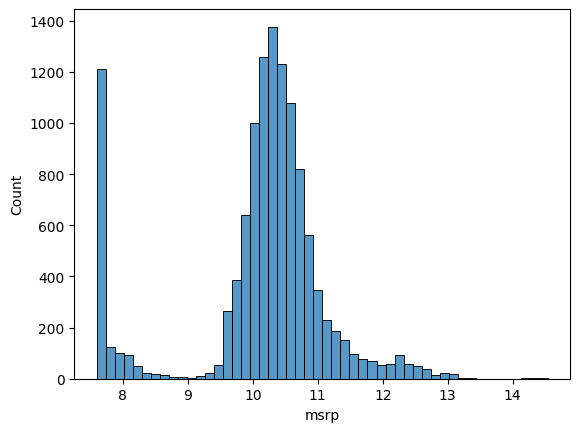

In [44]:
sns.histplot(np.log(df.msrp), bins=50)

In [45]:
price_logs=np.log1p(df.msrp)

In [46]:
df.isnull().sum()


make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [47]:
import random as rd
n=len(df)

idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-(n_test+n_val)

In [52]:
df_val=df.iloc[idx[:n_val]]
df_test=df.iloc[idx[n_val:n_val+n_test]]

df_train=df.iloc[idx[n_val+n_test:]]

In [53]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720,16395
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640,24145
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439,18000
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819,15990
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61,43585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [55]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [56]:
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

In [57]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
8597,kia,rondo,2008,regular_unleaded,162.0,4.0,automatic,front_wheel_drive,4.0,NaN,compact,wagon,26,19,1720
6408,subaru,legacy,2016,regular_unleaded,175.0,4.0,automatic,all_wheel_drive,4.0,NaN,midsize,sedan,36,26,640
11241,hyundai,veloster,2016,regular_unleaded,132.0,4.0,manual,front_wheel_drive,3.0,hatchback,compact,2dr_hatchback,35,27,1439
569,fiat,500,2017,premium_unleaded_(recommended),101.0,4.0,automatic,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,33,27,819
1659,lincoln,aviator,2005,premium_unleaded_(required),302.0,8.0,automatic,all_wheel_drive,4.0,luxury,midsize,4dr_suv,16,11,61


In [58]:
#buid a model linear regression
1+1

2

In [59]:
def linear_regression(X,W,b):
    return np.dot(W,X)+b

In [ ]:
#prediction
